# Creation of UMAP to identify batch effects

Import Packages and Data

In [176]:
#import packages
import pandas as pd
import umap 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Pia Kentschke
ATAC_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllOCRsInfo.csv"
ATAC_scores_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ATAC_scores.csv"
RNA_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/RNA-seq_data.csv"
Transcription_exons_path = "/Users/piakentschke/Documents/Uni/Data Analysis/refFlat.txt"
Cell_population_qc_path = "/Users/piakentschke/Documents/Uni/Data Analysis/mmc1.xlsx"
Voluntary_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllTFmotifsInOCRs.txt"


ATAC_scores = pd.read_csv(ATAC_scores_path, sep=",", keep_default_na=False)
RNA_seq = pd.read_csv(RNA_seq_path)
ATAC_seq = pd.read_csv(ATAC_seq_path, sep=",", keep_default_na=False)
QC = pd.read_excel(Cell_population_qc_path)

#drop peaks with infinite -log10 p values
ATAC_seq = ATAC_seq[ATAC_seq['_-log10_bestPvalue'] != np.inf]

#define threshold (p = 0.05)
threshold_pval = 1.3

# Filter ATAC-seq peaks based on logp value threshold 
ATAC_cleaned = ATAC_seq[ATAC_seq["_-log10_bestPvalue"] >= threshold_pval]


# Create data subsets
col_ATAC_seq_ab_act_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
    'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_act_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']

col_ATAC_seq_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp']

ATAC_seq_ab_act_gd_T = ATAC_cleaned[col_ATAC_seq_ab_act_gd_T]
ATAC_seq_gd_T = ATAC_seq[col_ATAC_seq_gd_T]
ATAC_seq_ab_act_T = ATAC_seq[col_ATAC_seq_ab_act_T]
ATAC_seq_ab_T = ATAC_seq[col_ATAC_seq_ab_T]

In [144]:
#add column with cell familys

#transpose ATAC dataframe
ATAC_cleaned_t = ATAC_cleaned.set_index('ImmGenATAC1219.peakID').T
ATAC_cleaned_t.index.name = 'CellType'

#subset qc dataframe to add only lineage, cell family and organ information
QC_subset = QC[['CellType', 'Lineage', 'CellFamily', 'Organ']]

#merge ATAC dataframe with QC subset, drop duplicate Celltype rows from QC and reset index (combined)
ATAC_w_info = ATAC_cleaned_t.merge(QC_subset, on='CellType', how='left').drop_duplicates(subset='CellType', keep='first').reset_index(drop=True)

#print NaN rows
ATAC_w_info[ATAC_w_info.isna().any(axis=1)]



,CellType,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,...,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595,Lineage,CellFamily,Organ
0,chrom,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,...,chrY,chrY,chrY,chrY,chrY,chrY,chrY,NaN,NaN,NaN
1,Summit,3120109,3121485,3372787,3399217,3400115,3416260,3434092,3434378,3446022,...,90811022,90811406,90811728,90812084,90812450,90812906,90828985,NaN,NaN,NaN
2,mm10.60way.phastCons_scores,0.07,0.15,0.03,0.06,0.44,0.01,0.18,0.15,0.0,...,0.04,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,_-log10_bestPvalue,10.8,3.02,1.31,2.39,2.57,2.57,1.34,1.83,2.23,...,4.35,2.6,2.33,3.12,3.99,3.21,1.41,NaN,NaN,NaN
4,Included.in.systematic.analysis,1,1,,1,1,1,,1,1,...,1,1,1,1,1,1,,NaN,NaN,NaN
5,TSS,,,,,,,,,,...,,,,,,,,NaN,NaN,NaN
6,genes.within.100Kb,,,,,,,,,,...,Erdr1,Erdr1,Erdr1,Erdr1,Erdr1,Erdr1,Erdr1,NaN,NaN,NaN
92,FRC.SLN,63.38,13.5,0.92,0.53,2.58,2.64,0.92,0.11,0.14,...,2.49,5.22,5.13,7.12,7.21,6.21,0.85,NaN,NaN,NaN


FRC.SLN not in QC metrics 

researched cell family etc and added it in in the following step

In [145]:
# add cell family, lineage and organ for FRC.SLN cells

ATAC_w_info.at[92, 'CellFamily'] = 'Fibroblastic reticular cell'
ATAC_w_info.at[92, 'Lineage'] = 'stroma'
ATAC_w_info.at[92, 'Organ'] = 'skin draining Lymph Node'

ATAC_w_info

,CellType,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,...,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595,Lineage,CellFamily,Organ
0,chrom,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,chr1,...,chrY,chrY,chrY,chrY,chrY,chrY,chrY,NaN,NaN,NaN
1,Summit,3120109,3121485,3372787,3399217,3400115,3416260,3434092,3434378,3446022,...,90811022,90811406,90811728,90812084,90812450,90812906,90828985,NaN,NaN,NaN
2,mm10.60way.phastCons_scores,0.07,0.15,0.03,0.06,0.44,0.01,0.18,0.15,0.0,...,0.04,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,_-log10_bestPvalue,10.8,3.02,1.31,2.39,2.57,2.57,1.34,1.83,2.23,...,4.35,2.6,2.33,3.12,3.99,3.21,1.41,NaN,NaN,NaN
4,Included.in.systematic.analysis,1,1,,1,1,1,,1,1,...,1,1,1,1,1,1,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,FRC.SLN,63.38,13.5,0.92,0.53,2.58,2.64,0.92,0.11,0.14,...,2.49,5.22,5.13,7.12,7.21,6.21,0.85,stroma,Fibroblastic reticular cell,skin draining Lymph Node
93,IAP.SLN,8.92,0.98,0.75,1.4,0.75,0.98,0.5,0.75,0.5,...,2.58,5.58,9.13,3.57,5.96,8.75,1.37,stroma,Pericyte,skin draining Lymph Node
94,BEC.SLN,1.33,1.28,1.33,0.9,2.3,1.33,1.92,2.59,2.69,...,3.91,3.18,2.21,2.64,5.17,6.83,0.57,stroma,Blood endothelial cell,skin draining Lymph Node
95,LEC.SLN,1.04,1.04,1.61,2.87,2.34,7.29,1.89,2.29,0.11,...,5.92,7.9,6.53,5.59,6.53,8.14,0.11,stroma,Lymphatic endothelial cell,skin draining Lymph Node


### UMAP colored by cell lineage

In [190]:
# subset ATAC_w_info for umap
ATAC_umap_subset = ATAC_w_info.iloc[7:, 1:-4].reset_index(drop=True)

# umap embedding
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# Fit the model to the ATAC data
umap_embedding = umap_model.fit_transform(ATAC_umap_subset)

# Create a DataFrame for the UMAP embedding
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])

#metadata columns
celltype = ATAC_w_info['CellType'].dropna()
lineage = ATAC_w_info['Lineage'].dropna()
cellfamily = ATAC_w_info['CellFamily'].dropna()
organ = ATAC_w_info['Organ'].dropna()

# Add metadata columns to the UMAP DataFrame
umap_df['CellType'] = celltype
umap_df['Lineage'] = lineage
umap_df['CellFamily'] = cellfamily
umap_df['Organ'] = organ

ATAC_umap_subset

/opt/miniconda3/envs/dataanalysisenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,ImmGenATAC1219.peak_14,...,ImmGenATAC1219.peak_512583,ImmGenATAC1219.peak_512584,ImmGenATAC1219.peak_512585,ImmGenATAC1219.peak_512586,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592
0,2.36,0.41,0.41,2.36,0.41,2.36,4.37,7.0,2.36,0.41,...,2.36,2.36,2.36,4.37,0.41,0.41,0.41,2.36,4.37,0.41
1,0.1,0.1,0.1,1.64,0.1,0.71,0.1,0.1,0.1,0.1,...,11.79,7.41,2.57,13.37,2.57,10.26,7.41,8.79,8.79,7.41
2,0.9,0.11,0.11,1.85,0.11,0.9,0.9,0.11,0.11,0.9,...,1.85,2.69,1.85,12.56,2.69,3.52,1.85,0.9,3.52,3.52
3,0.11,0.11,0.11,1.58,0.11,0.11,0.11,0.11,0.83,0.83,...,1.58,6.81,2.15,11.37,2.58,2.15,3.49,2.15,2.58,3.04
4,0.47,0.79,0.47,1.12,0.11,1.57,0.42,0.47,1.94,0.47,...,4.9,17.29,12.63,20.08,4.58,2.89,5.76,3.25,4.21,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,63.38,13.5,0.92,0.53,2.58,2.64,0.92,0.11,0.14,5.47,...,3.37,7.35,2.15,14.11,2.49,5.22,5.13,7.12,7.21,6.21
86,8.92,0.98,0.75,1.4,0.75,0.98,0.5,0.75,0.5,0.75,...,4.16,11.73,4.51,10.2,2.58,5.58,9.13,3.57,5.96,8.75
87,1.33,1.28,1.33,0.9,2.3,1.33,1.92,2.59,2.69,3.43,...,7.25,14.4,1.73,11.45,3.91,3.18,2.21,2.64,5.17,6.83
88,1.04,1.04,1.61,2.87,2.34,7.29,1.89,2.29,0.11,2.83,...,4.12,12.93,6.64,29.31,5.92,7.9,6.53,5.59,6.53,8.14


UMAP colored by lineage

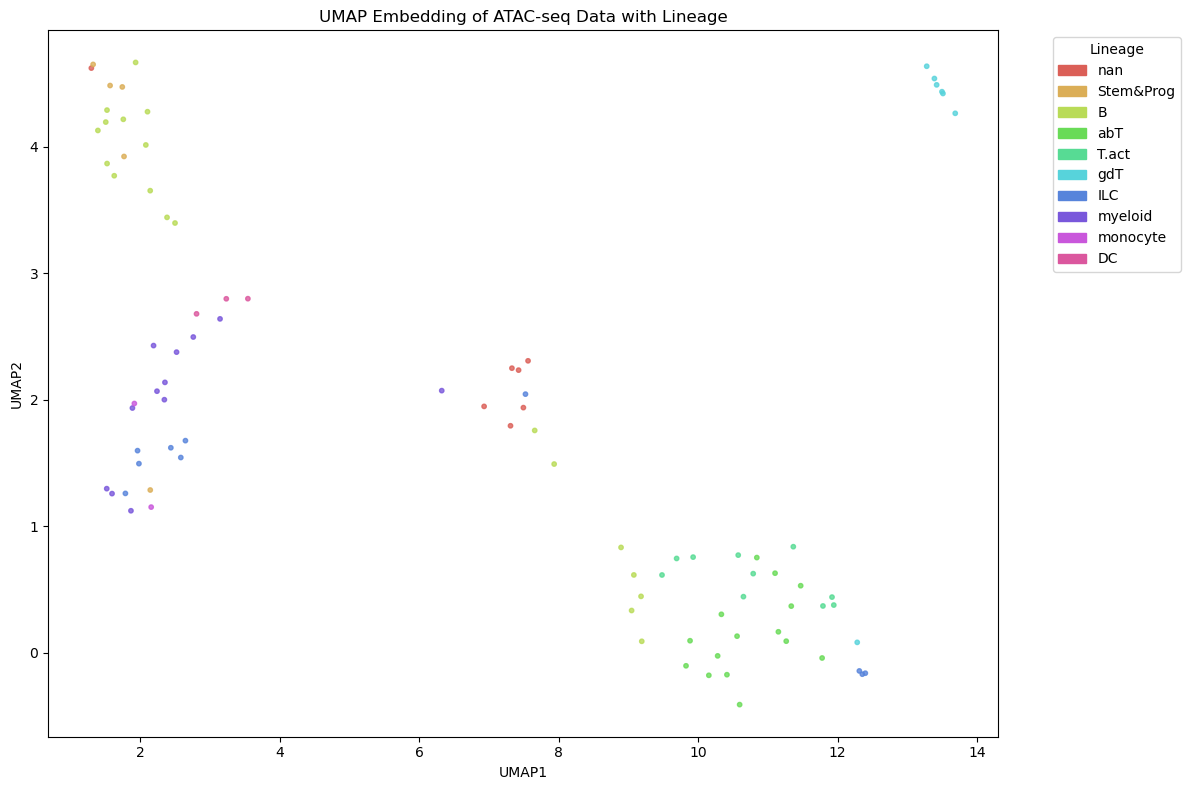

In [183]:
# Get unique lineages and assign colors
unique_lineages = umap_df['Lineage'].unique()
lin_palette = sns.color_palette("hls", len(unique_lineages))
lin_color_dict = dict(zip(unique_lineages, lin_palette))
lin_point_colors = umap_df['Lineage'].map(lin_color_dict)

# Plotting the UMAP embedding
plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=lin_point_colors, s=10 , alpha=0.8)
plt.title('UMAP Embedding of ATAC-seq Data with Lineage')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
lin_handles = [
    mpatches.Patch(color=lin_color_dict[lin], label=lin)
    for lin in unique_lineages
]
plt.legend(handles=lin_handles, title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plot the same umap and color by cluster and cell family, try kmeans, leiden, k nearest neighbors

schick oder?

### UMAP colored by cell family

/var/folders/bb/wtz1qdn10sz99v6ltwmxxx0c0000gn/T/ipykernel_62473/1553523839.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


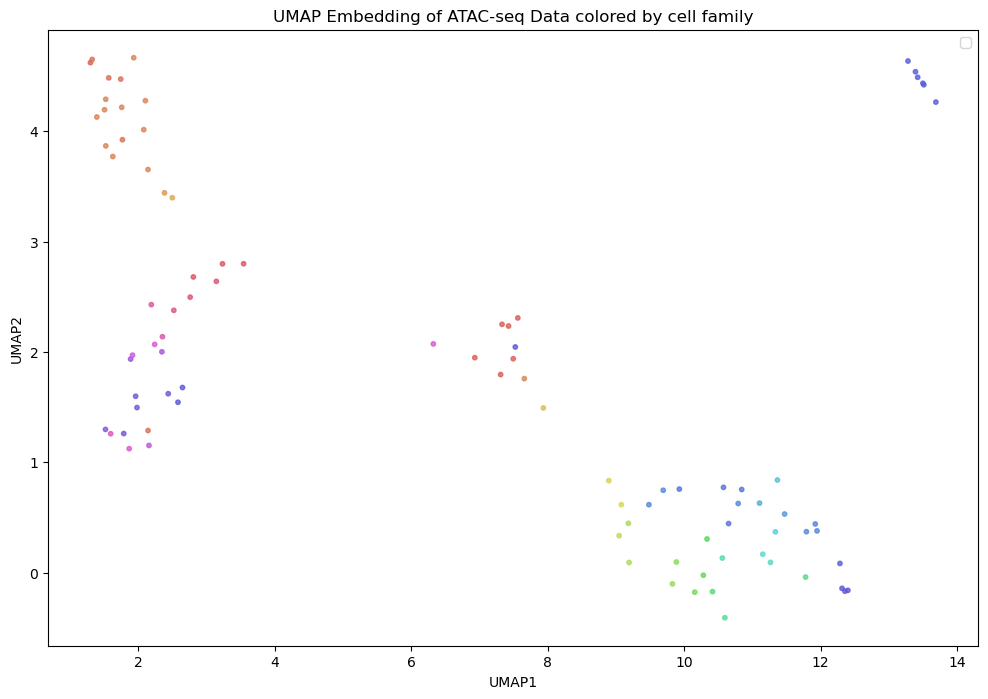

In [173]:
#extract cell family category
family = ATAC_w_info['CellFamily'].astype('category')

# Get unique lineages and assign colors
unique_fam = umap_df['CellFamily'].unique()
fam_palette = sns.color_palette("hls", len(unique_fam))
fam_color_dict = dict(zip(unique_fam, fam_palette))
fam_point_colors = umap_df['CellFamily'].map(fam_color_dict)


plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=fam_point_colors, s=10 , alpha=0.8)
plt.title('UMAP Embedding of ATAC-seq Data colored by cell family')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

/var/folders/bb/wtz1qdn10sz99v6ltwmxxx0c0000gn/T/ipykernel_62473/849083583.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


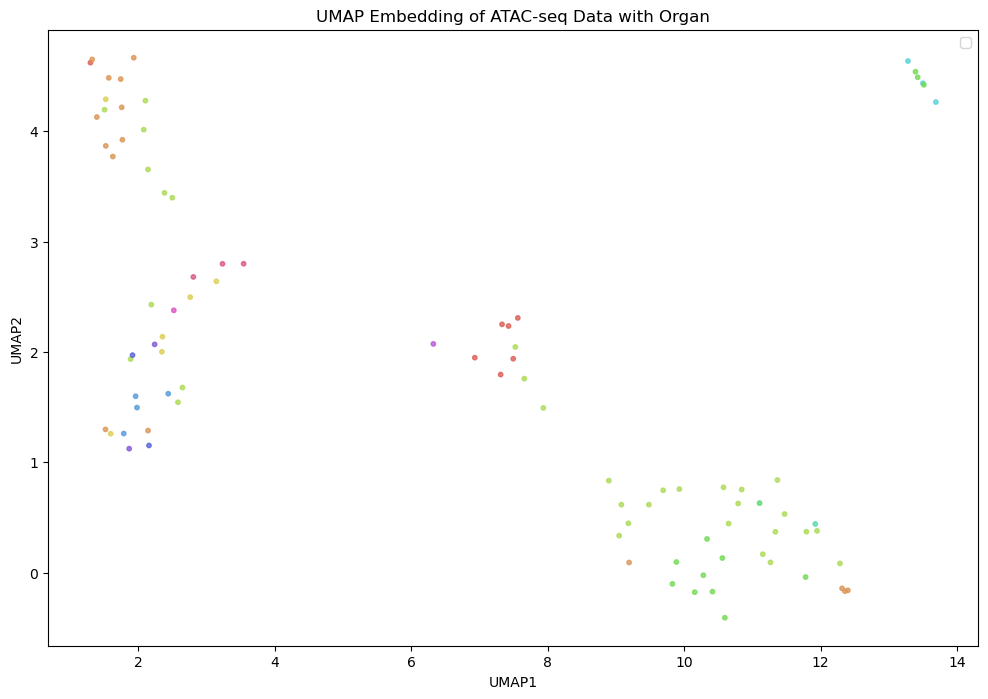

In [ ]:
#extract organ category
organ = ATAC_w_info['Organ'].astype('category')

# Get unique lineages and assign colors
unique_organs = umap_df['Organ'].unique()
org_palette = sns.color_palette("hls", len(unique_organs))
org_color_dict = dict(zip(unique_organs, org_palette))
org_point_colors = umap_df['Organ'].map(org_color_dict)


plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=org_point_colors, s=10 , alpha=0.8)
plt.title('UMAP Embedding of ATAC-seq Data colored by Organ')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

In [ ]:
# apply kmeans clustering to 
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_umap)

Cell Lineages

TO DO: 

UMAP of peak accessibility patterns => which peaks display similar accessibility (important for ab gd T cell differentiation specifically)